# Chapter12 回帰分析

In [1]:
# ライブラリーの準備
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
import statsmodels.formula.api as smf

plt.style.use('seaborn')
rcParams['font.family'] = 'IPAexgothic'
%precision 3
%matplotlib inline

In [2]:
# データの準備
df = pd.read_csv('../data/ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,小テスト,期末テスト,睡眠時間,通学方法
0,4.2,67,7.2,バス
1,7.2,71,7.9,自転車
2,0.0,19,5.3,バス
3,3.0,35,6.8,徒歩
4,1.5,35,7.5,徒歩


## 12.1 | 単回帰モデル

- 回帰分析（regression analysis）
  - 因果の関係が疑われる複数の変数を使って、ある変数からほかの変数の値を予測する手法。
  - 説明変数（explanatory variable）
    - 原因となる変数
    - 独立変数（independent variable）
  - 応答変数（response variable）
    - 結果となる変数
    - 従属変数（dependent variable）
  - 単回帰モデル（simple regression model）
    - 回帰分析において、説明変数と応答変数が1つずつの最も単純なモデル

- 応答変数: 期末テストの点数 $y$
- 説明変数: 小テストの平均点 $x$
- 説明変数の数: $p$

In [3]:
x = np.array(df['小テスト'])
y = np.array(df['期末テスト'])
p = 1

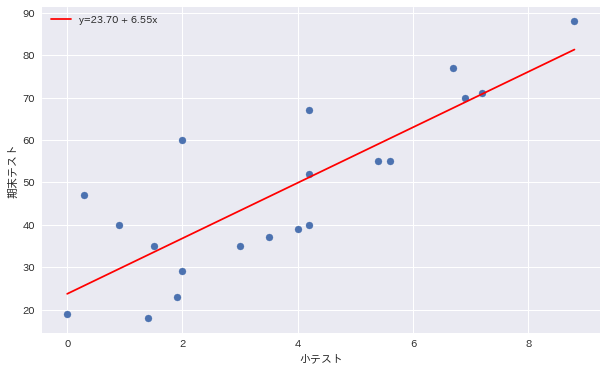

In [4]:
# 図 12.1: 散布図と回帰直線
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.set_xlabel('小テスト')
ax.set_ylabel('期末テスト')
ax.plot(
    xs, ys, color='red',
    label=f"y={poly_fit[1]:.2f} + {poly_fit[0]:.2f}x"
)
ax.legend()

ax.scatter(x, y)
plt.show()

### 12.1.1 回帰分析における仮説

単回帰モデルでは説明変数xと応答変数yの間に次のような関係性を仮定する

$$
y = \beta_0 + \beta_1 x
$$

- 誤差項（error term）$\epsilon_i$
  - 予測できない確率的なもの

期末テストの結果 $Y_i$

$$
Y_i = \beta_0 + \beta_1 x_i + \epsilon_i ~ (i = 1, 2, ..., n)
$$

- 説明変数は確率変数ではない
- $\epsilon_i$ は互いに独立に $N(0, \sigma^2)$ にしたがう
- 上記のことから、
- 確率変数 $Y_i$ は互いに独立に $N(\beta_0 + \beta_1 x_i, \sigma^2)$ にしたがう
- 小テストの平均点が「4点」の生徒の期末テストの点数を $(\beta_0 + 4\beta_1 , \sigma^2)$ にしたがう確率変数とみなす

これらの仮定のもとで、標本である$(x_1, Y_1), (x_2, Y_2), ..., (x_n, Y_n)$ から母数 $\beta_0 と \beta_1$ を推定する。

この $\beta_0 と \beta_1$ の推定値である $\hat{\beta_0} と \hat{\beta_1}$ によって作られる直線

$$
y = \hat{\beta_0} + \hat{\beta_1} x
$$

が、回帰直線（regression line）と呼ばれる。

その係数である $\hat{\beta_0} と \hat{\beta_1}$ を回帰係数（regression coefficient）という。

### 12.1.2 stansmodelsによる回帰分析

- 最小二乗法（Ordinary Least Squares, ols）

In [5]:
formula = '期末テスト ~ 小テスト'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Wed, 18 May 2022   Prob (F-statistic):           8.59e-06
Time:                        08:34:01   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
小テスト           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- モデルの概要とデータへのモデルの適合度
- 回帰係数の推定結果
- モデルに貸した誤差項が正規分布にしたがっているという仮定の妥当性

### 12.1.3 回帰係数

```text
             coef    std err  t     P>|t|  [0.025   0.975]
Intercept  23.6995   4.714   5.028   0.000   13.796   33.603
小テスト      6.5537   1.069   6.133   0.000   4.309   8.799
```

- `Intercept`: 切片 $\beta_0$
- `小テスト`: 傾き $\beta_1$
- `coef`: 回帰係数の推定値
- `std err`: 推定値の標準誤差
- `t`: 回帰係数に関する t 検定統計量
- `P>|t|`: t 検定統計量のp値
- `[0.025, 0.975]`: 回帰係数の95%信頼区間

#### 点推定

- 予測値（predicted value）
  - $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_i$ と実データ $y_i$ との乖離がもっとも小さい直線。
  - 残差二乗和がもっとも小さい直線。
- 残差（residual）$\epsilon_i$
  - $y_i と \hat{y_i} の差 ~ y_i - \hat{y_i}$
- 残差二乗和（residual sum of squares, RSS）$\sum_i^n \hat{\epsilon_i}^2$
- 最小二乗法（ordinary least squares）
  - 残差二乗和の最小化によって、$\hat{\beta_0} と \hat{\beta_1}$ を求める方法
- 最小二乗法によって求められた $\hat{\beta_0} と \hat{\beta_1}$ は、$\beta_0 と \beta_1$ の不偏一致推定量になる。

最小二乗法で $hat{\beta_0} と \hat{\beta_1}$ で求める。

In [6]:
# 1列目がすべて「1」、2列目が「x」となる行列Xを作る
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [7]:
# 最小二乗法の実行
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_2048/2240477964.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]


(23.699, 6.554)

In [8]:
# 予測値と残差を求める
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

- 残差 $\hat{\epsilon_i}$ は誤差項 $\epsilon_i$ に対応しているため、
- 残差の分散から母分散 $\sigma^2$ を推定できる。
- ただし、残差の自由度は回帰係数の数 $p+1$ だけ減り $n - p -1$ となるので、母分散の不偏推定量 $\hat{\sigma^2}$ は $n - p -1$ 割って計算される

$$
\hat{\sigma}^2 = \dfrac{1}{n - p -1}\sum_i^n (\hat{\epsilon_i} - \bar{\hat{\epsilon_i}})^2 = \dfrac{1}{n - p -1}\sum_i^n \hat{\epsilon_i}^2
$$

In [9]:
s_var = np.var(eps_hat, ddof=p+1)
s_var

134.290

#### 区間推定

- $\beta_0 と \beta_1$ の区間推定
- $\hat{\beta_0} と \hat{\beta_1}$ の標準誤差が必要
- $\hat{\beta_0} と \hat{\beta_1}$ の標準誤差 $\sqrt{C_0 \hat{\sigma}^2} と \sqrt{C_1 \hat{\sigma}^2}$
- $(XX^T)^{-1}$ の対角成分の1番目が $C_0$、2番目が $C_1$ となる。

In [10]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))
C0, C1

(0.165, 0.009)

In [11]:
np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.714, 1.069)

- $\hat{\sigma}^2$ の自由度が $n - 2$
- 回帰係数の信頼区間は、自由度$n - 2$の t 分布を使って求めることができる。

#### 回帰係数の信頼区間

回帰係数 $\beta_0 と \beta_1$ の信頼区間 $100(1 - \alpha)\%$ の信頼区間は、

$$
\left[~
\hat{\beta_i} - t_{\alpha/2}(n - 2)\sqrt{\hat{\sigma}^2 C_i}, ~
\hat{\beta_i} - t_{1 - \alpha/2}(n - 2)\sqrt{\hat{\sigma}^2 C_i} ~
~\right] ~ (i = 0, 1)
$$

で推定される。

In [12]:
# B0_hatの95%信頼区間を求める
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
ucl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
lcl, ucl

(13.796, 33.603)

In [13]:
# B1_hatの95%信頼区間を求める
rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
ucl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
lcl, ucl

(4.309, 8.799)

#### t 検定

- 回帰係数 $beta_1$ の仮説検定
  - 帰無仮説: $\beta_1 = 0$
  - 対立仮説: $\beta_1 \neq 0$
- $\beta_1 = 0$ の場合、
  - $y_i = \beta_0 + 0 * x_i + \epsilon_i = \beta_0 + \epsilon_i$
  - 説明変数が応答変数に一切影響を与えないモデルとなる。
- $\beta_1 \neq 0$ の場合、
  - 説明変数が応答変数に影響を与えていることを主張できる。

この仮説検定の検定統計量は、

$$
t = \dfrac{\hat{\beta_1} - \beta_1}{\sqrt{\hat{\sigma}^2 C_1}}
$$

この t も残差の制約から自由度 $n - 2$ の t 分布にしたがう。

さらに、帰無仮説のもとでは $\beta_1 = 0$ なので、

$$
t = \dfrac{\hat{\beta_1}}{\sqrt{\hat{\sigma}^2 C_1}}
$$

となる。

In [14]:
t = beta1_hat / np.sqrt(s_var * C1)
t

6.133

In [15]:
# p値
(1 - rv.cdf(t)) * 2

0.000

- 帰無仮説は棄却され、小テストの平均点と期末テストの点数には因果関係がるといえそう。

- 回帰係数 $beta_0$ の仮説検定
  - 帰無仮説: $\beta_0 = 0$
  - 対立仮説: $\beta_0 \neq 0$

In [16]:
t = beta0_hat / np.sqrt(s_var * C0)
t

5.028

In [17]:
# p値
(1 - rv.cdf(t)) * 2

0.000

## 12.2 | 重回帰モデル

- 重回帰モデル（multiple regression model）
  - 説明変数が複数ある回帰モデル
  - $p$ 個の説明変数 $x_1, x_2, ..., x_p$ と応答変数 $y$ のあいだには次のような関係性を仮定したモデルといえる。
  - $y = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p $

In [18]:
# 重回帰分析
formula = '期末テスト ~ 小テスト + 睡眠時間'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Wed, 18 May 2022   Prob (F-statistic):           6.19e-06
Time:                        08:34:02   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
小テスト           6.4289      0.956      6.725      0.000       4.412       8.446
睡眠時間           4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 12.2.1 回帰係数

In [19]:
x1 = df['小テスト']
x2 = df['睡眠時間']
y = df['期末テスト']
p = 2

In [20]:
# B0, B1, B2の推定値を求める
X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat, beta2_hat

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_2048/772113141.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]


(-1.871, 6.429, 4.192)

$\hat{\beta_0}, \hat{\beta_1}, \hat{\beta_2}$ を使って、
予測値 $\hat{y} = \hat{\beta_0} + \hat{\beta_1}x_{i1} + \hat{\beta_2}x_{i2}$ と 
残差 $\hat{\epsilon_i} = y_i - \hat{y_i}$ を求める。

In [21]:
y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat
eps_hat 

0     11.689338
1     -6.531491
2     -1.345130
3    -10.919325
4     -4.210202
5      4.227954
6     -5.368293
7     -1.235327
8     -4.545620
9     -9.282828
10    -3.573883
11     3.618926
12   -14.682153
13     7.727375
14    18.438646
15    13.581385
16    -1.214809
17    -9.730262
18    -6.315512
19    19.671212
dtype: float64

In [22]:
# 標準誤差
s_var = np.sum(eps_hat ** 2) / (n - p - 1)
s_var

107.159

In [23]:
# 区間推定
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))
C0, C1, C2

(1.263, 0.009, 0.030)

In [24]:
# 睡眠時間の係数B2の95%信頼区間を求める
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
ucl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
lcl, ucl

(0.440, 7.943)

### 12.2.2 ダミー変数

- ダミー変数（dummy variable）
  - 質的変数を変換して量的変数と同様に扱えるようにする手法
  - ダミー変数は「0」と「1」をとる2値変数
  - 変換したい質的変数のカテゴリ数から1つ減らした数だけ必要になる
    - 徒歩: $(x_{徒歩} = 1, x_{自転車} = 0)$
    - 自転車: $(x_{徒歩} = 0, x_{自転車} = 1)$
    - バス: $(x_{徒歩} = 0, x_{自転車} = 0)$

説明変数を「小テスト」と「睡眠時間」、「通学方法」にした重回帰モデル

$$
Y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i 徒歩} + \beta_4 x_{i 自転車} + \epsilon_i
$$

In [25]:
formula = '期末テスト ~ 小テスト + 睡眠時間 + 通学方法'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Wed, 18 May 2022   Prob (F-statistic):           7.47e-05
Time:                        08:34:02   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4788     12.068     -0.040      0.969     -26.202      25.244
通学方法[T.徒歩]     -5.8437      5.447     -1.073      0.300     -17.453       5.766
通学方法[T.自転車]     1.8118      6.324      0.286      0.778     -11.668      15.292
小テスト            6.0029      1.033      5.809      0.000       3.800       8.206
睡眠時間            4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         39.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 12.3 | モデルの選択

- 過学習（over fitting）
  - 説明変数を増やしていくだけで、当てはまりの良さは上がっていくが、
  - そのようにしてできたモデルは、一般的に予測精度が下がる
  - あまりに複雑なモデルは、表現力が高すぎるあまり手元のデータに対して適合しすぎて、汎化的な予測性能を失ってしまう。
- モデルは、適合度の良さよりも予測の精度の良さを比較して選ぶことになる。

```text
Dep. Variable:	期末テスト 	  R-squared:	0.676
Model:	OLS	Adj.            R-squared:	0.658
Method:	Least Squares	    F-statistic:	37.61
Date:	Mon, 16 May 2022	Prob (F-statistic):	8.59e-06
Time:	08:53:55	        Log-Likelihood:	-76.325
No. Observations:	20	    AIC:	156.7
Df Residuals:	18	        BIC:	158.6
Df Model:	1		
Covariance Type: nonrobust		
```

In [26]:
formula = '期末テスト ~ 小テスト'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  期末テスト   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Wed, 18 May 2022   Prob (F-statistic):           8.59e-06
Time:                        08:34:02   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
小テスト           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# 予測値
y_hat = np.array(result.fittedvalues)
y_hat

array([51.225, 70.886, 23.699, 43.361, 33.53 , 29.598, 36.152, 46.638,
       49.914, 59.09 , 51.225, 68.92 , 36.807, 81.372, 25.666, 67.61 ,
       51.225, 60.4  , 32.875, 36.807])

In [28]:
# 残差
eps_hat = np.array(result.resid)
eps_hat

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

In [29]:
# 残差二乗和
np.sum(eps_hat ** 2)

2417.228

### 12.3.1 決定係数

- 決定係数（R-squared）$R^2$
  - モデルのデータへの適合度を表す基本的な指標
  - $0 \leq R^2 \leq 1$
  - 「1」に近いほどモデルはデータへよく適合していると考える
- 全変動（total variance）
  - 観測値 $y_i$ のばらつき度合いを表す指標
  - $\sum\nolimits_{i=1}^n(y_i - \bar{y})^2$
- 回帰変動（explained variance）
  - 予測値 $\hat{y_i}$ が観測値の平均値 $\bar{y}$ に対してのばらつき度合いを表す指標
  - $\sum\nolimits_{i=1}^n(\hat{y_i} - \bar{y})^2$
  - 予測値 $\hat{y_i}$ が観測値 $y_i$ に近いほど全変動に近づく
- 残差変動（unexplained variance）
  - 残差のばらつきを表す指標
  - $\sum\nolimits_{i=1}^n \hat{\epsilon_i}^2$
  - 残差二乗和と同じ
  - 予測値 $\hat{y_i}$ が観測値 $y_i$ に近いほど「0」に近づく
- 全変動 = 回帰変動 + 残差変動

- 予測値 $\hat{y_i}$ が観測値 $y_i$ に近ければ、回帰変動は全変動に近い値になる。
- 全変動のうち回帰変動の占める割合が大きければ、適合度がよいモデルといえそう

$$
R^2 = \dfrac{回帰変動}{全変動} = 1 - \dfrac{残差変動}{全変動}
$$

In [30]:
# 各変動と求める
total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)
total_var, exp_var, unexp_var

(7468.550, 5051.322, 2417.228)

In [31]:
# 全変動 = 回帰変動 + 残差変動
total_var, exp_var + unexp_var

(7468.550, 7468.550)

In [32]:
# 決定係数を求める
exp_var / total_var

0.676

- 単回帰の決定係数は、
- 説明変数と応答変数の相関係数の二乗 $r_{xy}^2$ に一致する

In [33]:
np.corrcoef(x, y)[0, 1] ** 2

0.676

各モデルの決定係数

- 期末テスト ~ 小テスト: 0.676
- 期末テスト ~ 小テスト + 睡眠時間: 0.756
- 期末テスト ~ 小テスト + 睡眠時間 + 通学方法: 0.782

&nbsp;

- 決定係数は、どんな無意味な変数であっても、説明変数が増えると値が増加する。

### 12.3.2 自由度調整済み決定係数 $\bar{R}^2$

- 自由度調整済み決定係数（adjusted R-square）
  - 説明変数を追加したときに、その説明変数にある程度以上の説明力がない場合は値が増加しないように調整した決定係数
  - 自由度を考慮した決定係数

$$
\bar{R}^2 = 1 - \dfrac{残差変動 / (n - p - 1)}{全変動 / (n - 1)}
$$

- p: 回帰係数の数

$$
全変動の自由度 = 回帰変数の自由度 + 残差変動の自由度
$$

- 回帰変数の自由度は、モデルの自由度とも呼ばれる
- `statsmodels`の分析結果の`Df Model`
- 残差変動の自由度は、残差の自由度とも呼ばれる

In [34]:
# 自由度調整済み決定係数を求める
1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))

0.638

各モデルの自由度調整済み決定係数

- 期末テスト ~ 小テスト: 0.658
- 期末テスト ~ 小テスト + 睡眠時間: 0.727
- 期末テスト ~ 小テスト + 睡眠時間 + 通学方法: 0.724

### 12.3.3 F検定

- F 検定（F test）
  - 切片 $\beta_0$ 以外の回帰係数に関する検定
  - 帰無仮説: $\beta_1 = \beta_2 = ... = \beta_p = 0$
  - 対立仮説: すなくとも1つの $\beta-i$ は「0」ではない。
  - t 検定のように個々の回帰係数に対してではなく、モデル全体に対して行われる 
- F 検定統計量
  - F-statistic
- p値
  - Prob (F-statistic)

$$
F = \dfrac{回帰変動 / p}{残差変動 / (n - p - 1)}
$$

- モデルの適合度がよいときほど、残差変動より回帰変動が大きくなることを利用している
- F 検定統計量がある値より大きくなった場合、モデルがデータに適合していると考える
  - 上側の片側検定を行う
- F 検定統計量は分散の比を検定していると解釈できる
- **分散分析（analysis of variance, ANOVA）**とも呼ばれる

In [35]:
# F 検定統計量を求める
f = (exp_var / p) / (unexp_var / (n - p - 1))
f

17.763

In [36]:
# p値を求める
rv = stats.f(p, n-p-1)
1 - rv.cdf(f)

0.000

### 12.3.4 最大対数尤度とAIC

- 赤池情報量規準（Akaike's information criterion, AIC）
  - 尤度
  - 最大対数尤度

#### 尤度（likelihood）

- ある観測値が得られる確率

コインの確率関数を $f(x)$、得られた観測値 $x_1, x_2, x_3, x_4, x_5$ とすると、

尤度 $L$ は、

$$
L = \prod_{i=1}^5 f(x-i) = 0.3^2 0.7^3 \simeq 0.031
$$

In [37]:
prob = 0.3
coin_result = [0, 1, 0, 0, 1]

rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
L

0.031

コインの表の出る確率がわからないときに、$[0, 1, 0, 0, 1]$ という結果を得た場合の尤度は、

$$
L = \prod_{i=1}^5 f(x_i) = p^2(1 - p)^3
$$

と書くことができる。

- この場合、母数 $p$ が未知のため、尤度 $L$ は $p$ の関数になったように見える。
- これを**尤度関数（likelihood function）$L(p)$** と呼ぶ。

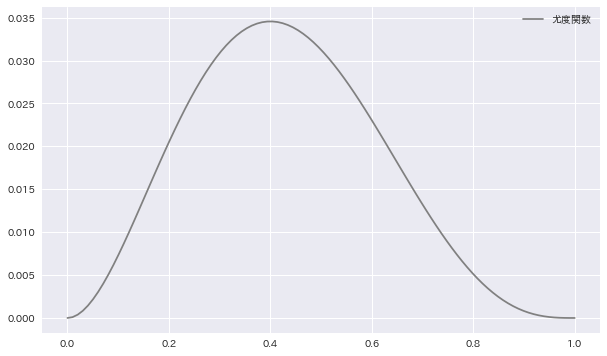

In [38]:
# pを0から1で変化させたときの尤度関数を描画する
ps = np.linspace(0, 1, 100)
Ls = [
    np.prod(stats.bernoulli(prob).pmf(coin_result))
    for prob in ps
]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ps, Ls, label='尤度関数', color='gray')
ax.legend()
plt.show()

- 観測値にとって $p = 0.4$ が最もそれらしい母数であるといえる。

&nbsp;

- 最尤推定法（method of maximum likelihood）
  - 観測値のとって最も尤もらしいという理由で母数 $p$ を推定する方法
- 最尤推定量（maximum likelihood estimator）
  - 最尤推定法によって推測される推定量
- 最尤推定値（maximum likelihood estimate）
  - 最尤推定法によって推測される推定値

- $f(x)$ を
  - 離散型確率変数の場合は確率関数で、
  - 連続型確率変数の場合は確率密度関数とすると
- 次の定義はどちらの場合にも対応した尤度の定義

$$
L = \prod_{i=1}^n f(x_i)
$$

- 尤度は確率の積となるため、かければかけるほど「0」に近づく
- 対数尤度（log-likelihood）
  - 尤度の対数をとったもの

$$
log~L = \sum_{i=1}^n log~f(x_i)
$$

- 尤度関数が最大となるとき、対数尤度関数も最大となる。
- 最尤推定は、対数尤度関数が最大となるときのパラメータとして求めることができる。
  - 対数尤度関数が最大のときの対数尤度の値を**最大対数尤度（maximum log-likelihood）**という。

In [39]:
# 最大対数尤度を求める
prob = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0, 1, 0, 0, 1])))
mll

-3.365

#### 最大対数尤度

- 単回帰モデルはでは、$Y_i \sim N(\beta_0 + \beta_1 x_i, \sigma^2)$ という関係を仮定した。
- この仮定のもとで観測値 $(x_1, y_1), (x_1, y_1), ..., (x_n, y_n)$ に対する最大対数尤度は、モデルのデータへの宛hまりの良さを表していると考えることができる。
- $\beta_0, \beta_1 x_i, \sigma^2$ の最尤推定量は、それぞれ$\hat{\beta_0}, \hat{\beta_1}, \frac{1}{n} \sum\nolimits_{i=1}^n \hat{\epsilon_i}$ となる。

最大対数尤度は、$N(\hat{y}, \sum\nolimits_{i=1}^n \hat{\epsilon_i})$ の密度関数 $f(x)$ として、

$$
\sum_{i=1}^n log~f(y_i)
$$

と求めることができる。

In [40]:
rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
mll

-76.325

各モデルの最大対数尤度

- 期末テスト ~ 小テスト: -76.325
- 期末テスト ~ 小テスト + 睡眠時間: -73.497
- 期末テスト ~ 小テスト + 睡眠時間 + 通学方法: -72.368

&nbsp;

- 最大対数尤度も説明変数を増やすと、値が増える特徴を持つ

#### AIC

$$
AIC = -2 * 最大対数尤度 + 2 * 回帰係数の数
$$

- 最大対数尤度に回帰係数の数をペナルティとして付け加える

In [41]:
aic = -2 * mll + 2 * (p+1)
aic

158.650

各モデルのAIC

- 期末テスト ~ 小テスト: 156.7
- 期末テスト ~ 小テスト + 睡眠時間: 153.0
- 期末テスト ~ 小テスト + 睡眠時間 + 通学方法: 154.7

&nbsp;

- AICは、値が小さいほどモデルの予測精度がよいと考える。

#### ベイズ情報量規準

- ベイズ情報量規準（bayesian information criterion, BIC）
  - BICは、回帰係数に加え、サンプルサイズ $n$ に対してもペナルティを加える。

$$
BIC = -2 * 最大対数尤度 + log~n * 回帰係数の数
$$

In [42]:
bic = -2 * mll + np.log(n) * (p+1)
bic

161.638

各モデルのBIC

- 期末テスト ~ 小テスト: 158.6
- 期末テスト ~ 小テスト + 睡眠時間: 156.0
- 期末テスト ~ 小テスト + 睡眠時間 + 通学方法: 159.7

&nbsp;

- BICは、値が小さいほどモデルの予測精度がよいと考える。

## 12.4 | モデルの妥当性

- モデルの妥当性とは、
  - 「誤差項 $\epsilon_i$ は互いに独立に $N(0, \sigma^2)$ にしたがう」という仮説が満たされているかの確認。
  - 誤差項 $\epsilon_i$ に関する確認なので、分析対象は 残差 $\hat{\epsilon_i}$

In [44]:
eps_hat = np.array(result.resid)
eps_hat

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

### 12.4.1 正規性の検定

- 誤差項 $\epsilon_i$ が $N(0, \sigma^2)$ にしたがうという仮定が妥当かを調べる。
  - 残差 $\hat{\epsilon_i}$ が正規分布にしたがっているかを確かめる正規性の検定。
  - Omnibus検定 `Omnibus`, `Prob(Omnibus)`
  - Jarque-Beta検定 `Jarque-Beta (JB)`, `Prob(JB)`
  - 帰無仮説: 残差項は正規分布にしたがっている
  - 対立仮説: 残差項は正規分布にしたがっていない
  - 有意水準である 0.05 より大きければとくに問題はない


#### 歪度（skewness）

- 分布が左右対称かどうかを判断できる
- 正規分布のような左右対称な分布であれば「0」
- カイ二乗分布のように「右に歪んだ」分布であれば、「0より大きい」値になる
- 「左に歪んだ」分布のとき、「0より小さい」値になる

$$
\sum_i^n (\dfrac{x - \bar{x}}{S})^3
$$

In [45]:
stats.skew(eps_hat)

0.670

#### 尖度（kurtosis）

- 分布の尖り具合を測る指標
- 正規分布であれば、「3」になる
- 正規分布より尖ったピークをもつ分布の場合「3より大きい」値になる
- 正規分布より丸みがかったピークをもつ分布の場合「3より小さい」値になる

In [46]:
stats.kurtosis(eps_hat, fisher=False)

2.422

### 12.4.2 ダービン・ワトソン比

- ダービン・ワトソン比（Durbin-Watson ratio）
  - 異なる誤差項は互いに無相関であることを確認する指標
  - 扱っているデータが時系列データである場合にとくに重要
  - 「0 ~ 4」の値をとる
  - 「0」に近ければ、「正の相関」
  - 「2」に近ければ、「無相関」
  - 「4」に近ければ、「負の相関」

$$
\dfrac{\sum\nolimits_{i=2}^n (\hat{\epsilon}_i - \hat{\epsilon}_{i-1})}
{\sum\nolimits_{i=1}^n \hat{\epsilon}_i^2}
$$

In [47]:
np.sum(np.diff(eps_hat, 1) ** 2) / np.sum(eps_hat ** 2)

1.478

### 12.4.3 多重共線性

- `Cond. No.`
- 多重共線性とは、
  - 説明変数間で、非常に強い相関が生じていることを指す
  - 多重共線性がひどいと、回帰係数の分散が大きくなりモデルの予測結果が悪くなる